# Where Oh Where Do Stars Live?

In this exercise, we are going to look at where stars live, or at least like to spend there time, in our Galaxy. To do this, let's download some data from Gaia.

In [2]:
from astroquery.gaia import Gaia

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
job = Gaia.launch_job_async("SELECT TOP 10000 ra, dec, parallax, pmra, pmdec, radial_velocity "
                            "FROM gaiadr3.gaia_source AS g3 "
                            "WHERE parallax > 10 AND radial_velocity IS NOT NULL")
data = job.get_results()

Retrieving table 'gaiadr3.gaia_source'
INFO: Query finished. [astroquery.utils.tap.core]


In [3]:
data

ra,dec,parallax,pmra,pmdec,radial_velocity
deg,deg,mas,mas / yr,mas / yr,km / s
float64,float64,float64,float64,float64,float32
251.58997660680922,-50.63863518231249,13.398257319108815,-49.35844067323052,-84.67277009494555,12.315269
251.41861371149386,-50.568383922784385,18.395337998280908,-20.821239369836658,-76.53943156160437,-29.955275
250.18507947208107,-51.477673785228106,19.588654431566606,11.454067954459212,131.33292721367764,45.4255
250.7629100535151,-51.606571251985955,10.368954647575999,5.946151060742354,-40.65596429190273,7.1170692
250.77290213984702,-51.59898526057091,10.326265936660176,6.066630513795433,-40.46666568311353,7.0510607
295.68121945345376,70.43496646325707,10.50037348382855,54.99058892782826,124.80841108932603,14.95659
317.39525377167513,67.90857647877061,11.136129400323746,21.850731877650464,-27.36952236247886,-40.08965
279.7406005268009,72.83133250691661,11.024659359604769,59.34113088167453,14.588749094906138,14.920183


Now let's load all of the data into a `galpy` orbit object and examine what the stars' positions and dynamics currently look like.

In [4]:
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# create sky coordinate
c = SkyCoord(ra=data['ra'],
             dec=data['dec'],
             distance=(1000 / data['parallax']) * u.pc,
             pm_ra_cosdec=data['pmra'],
             pm_dec=data['pmdec'],
             radial_velocity=data['radial_velocity'])
# integrate orbit
o = Orbit(c, ro=8, vo=220)

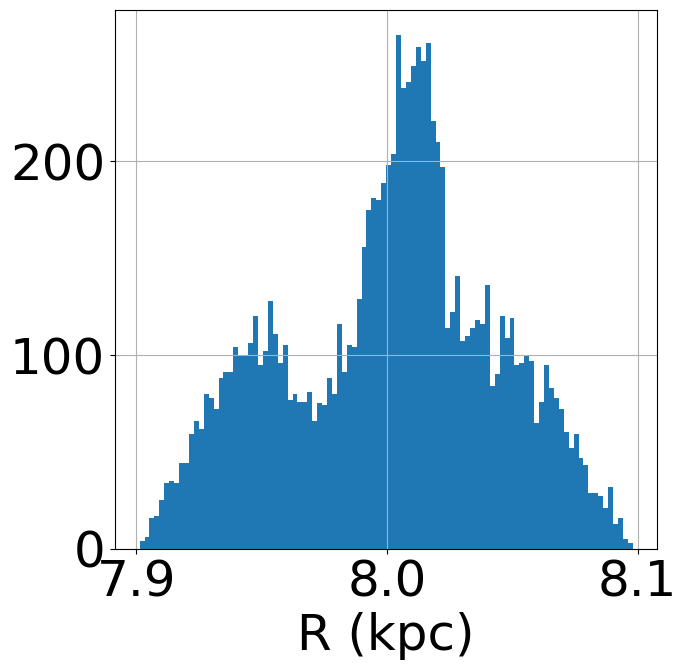

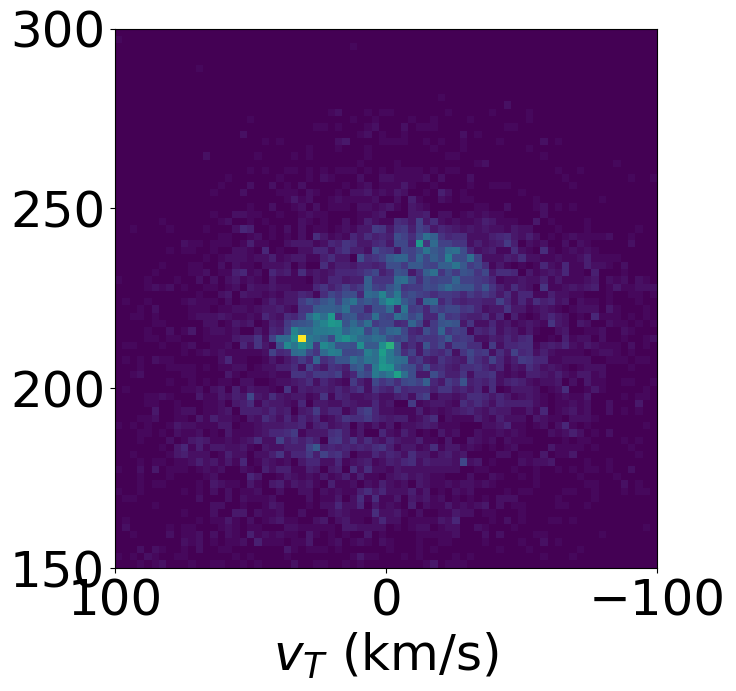

In [5]:
# plot the distirubtion of Galactic radii
plt.figure(figsize=(7, 7))
plt.hist(o.R(use_physical=True), bins=100)
plt.grid()
plt.xlabel('R (kpc)')
plt.show()

plt.figure(figsize=(7, 7))
plt.hist2d(o.vR(use_physical=True), o.vT(use_physical=True),
           bins=[np.linspace(-100, 100, 75), np.linspace(150, 300, 75)])
plt.xlabel(r'$v_R$ (km/s)')
plt.xlabel(r'$v_T$ (km/s)')
plt.gca().invert_xaxis()
plt.show()

From this you can see we have selected a very local group of stars! They all see to have distinct velocties with a stange distribution (more on that later!). But, even though all of these stars are within 100 pc of the sun right now, what would things look like 500 Myr from now? Use what you know about `galpy` to integrate the orbits and see where the stars end up.

In [6]:
# add code here!

# HINT integrate orbits like this
# ts = np.linspace(0, 0.5, 10) * u.Gyr
# o.integrate(ts, MWPotential2014, method='dop853_c')



Wow, it seems like these stars in the Solar Neighborhood certainly have gone on quite a journey! Now try to identify one that has move very far and plot its orbit.

In [12]:
# add code here!!!

# HINT! you can index orbits and only integrate the orbit for that one


Now what does an orbit look like for a star that didn't venture far from home?

In [20]:
# add code here!!!



Discuss the likely difference in the orgin of these two stars.